In [ ]:
#import shutil
#shutil.rmtree('./mnist_png/test8/')

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import natsort
import cv2 as cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import tensorflow as tf
from tensorflow import shape,math
from tensorflow.keras import Input,layers,Model
from tensorflow.keras.losses import mse,binary_crossentropy
from tensorflow.keras.utils import plot_model

print(tf.__version__)

2.9.2


## 0 이미지로만 구성된 training dataset

In [ ]:
from google.colab import files 

uploaded = files.upload()

# 코드가 돌아가면 파일선택 버튼을 눌러서 upload할 파일 선택
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn]))) 

Saving training.zip to training.zip
User uploaded file "training.zip" with length 2482527 bytes


## 0 이미지로만 구성된 testing dataset

In [ ]:
from google.colab import files 

uploaded = files.upload()

# 코드가 돌아가면 파일선택 버튼을 눌러서 upload할 파일 선택
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving testing_0.zip to testing_0.zip
User uploaded file "testing_0.zip" with length 408390 bytes


## 8 이미지로만 구성된 testing dataset

In [ ]:
from google.colab import files 

uploaded = files.upload()

# 코드가 돌아가면 파일선택 버튼을 눌러서 upload할 파일 선택
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn]))) 

Saving testing.zip to testing.zip
User uploaded file "testing.zip" with length 405114 bytes


## 0, 8 이미지로 구성된 testing dataset

In [ ]:
from google.colab import files 

uploaded = files.upload()

# 코드가 돌아가면 파일선택 버튼을 눌러서 upload할 파일 선택
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn]))) 

Saving 0_8_mixed.zip to 0_8_mixed.zip
User uploaded file "0_8_mixed.zip" with length 416939 bytes


In [ ]:
! mkdir mnist_png
! mkdir mnist_png/train
! mkdir mnist_png/test

In [ ]:
! unzip training.zip -d ./mnist_png/train
! unzip testing_0.zip -d ./mnist_png/test0
! unzip testing.zip -d ./mnist_png/test8
! unzip 0_8_mixed.zip -d ./mnist_png/test0_8

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: ./mnist_png/train/0/458.png  
 extracting: ./mnist_png/train/0/45812.png  
 extracting: ./mnist_png/train/0/45817.png  
 extracting: ./mnist_png/train/0/45823.png  
 extracting: ./mnist_png/train/0/45830.png  
 extracting: ./mnist_png/train/0/45833.png  
 extracting: ./mnist_png/train/0/45837.png  
 extracting: ./mnist_png/train/0/45840.png  
 extracting: ./mnist_png/train/0/45853.png  
 extracting: ./mnist_png/train/0/45857.png  
 extracting: ./mnist_png/train/0/4588.png  
 extracting: ./mnist_png/train/0/45905.png  
 extracting: ./mnist_png/train/0/45908.png  
 extracting: ./mnist_png/train/0/45939.png  
 extracting: ./mnist_png/train/0/45942.png  
 extracting: ./mnist_png/train/0/45952.png  
 extracting: ./mnist_png/train/0/45953.png  
 extracting: ./mnist_png/train/0/45960.png  
 extracting: ./mnist_png/train/0/45966.png  
 extracting: ./mnist_png/train/0/4597.png  
 extracting: ./mnist_png/train/0/45975.png  
 extracting: ./mnist_pn

## 0 이미지로만 학습하도록 구성

In [ ]:
# 압축해제된 데이터 경로
src_train = './mnist_png/train/'
src_test = './mnist_png/test0/'

#이미지 읽기
def img_read(src,file):
    img = cv.imread(src+file,cv.COLOR_BGR2GRAY)
    return img

#src 경로에 있는 이미지 파일 리스트 저장 

# train data
files0 = os.listdir(src_train + str(0))

#test data
files0_test = os.listdir(src_test + str(0))

# 경로와 파일명을 입력으로 넣어 확인하고 
# 데이터를 255로 나눠서 0~1사이로 정규화 하여 X 리스트에 넣는다.
# 255로 나눠주는 이유는, 이미지 데이터는 픽셀 정보를 0~255 사이의 값으로 가지는데, 이를 255로 나누어주면 0~1.0 사이의 값을 가지게 되기 때문이다.

# train data
X,Y = [],[]
for file in files0:
    X.append(img_read(src_train + str(0) + '/',file)/255.)
    Y.append(1) # nomal label : 1

# test data
X_test,Y_test = [],[]
for file in files0_test:
    X_test.append(img_read(src_test + str(0) +'/',file)/255.)
    Y_test.append(1) # nomal label : 1

# array로 데이터 변환
X = np.array(X)
Y = np.array(Y)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Train set, Test set으로 나누기
x_train = X
y_train = Y
x_test = X_test
y_test = Y_test
x_train = np.array(x_train)
x_test = np.array(x_test)

 # (image,image)이미지를 크기의 (image*image,)크기의 벡터로 변환
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print("Datasets_train_shape:{}  Datasets_test_shape:{}".format(np.shape(x_train),np.shape(x_test)))

Datasets_train_shape:(5923, 784)  Datasets_test_shape:(980, 784)


In [ ]:
print(len(x_train[0]))

784


## Anomaly data로딩(8 이미지로만 구성)

In [ ]:
src_test8 = './mnist_png/test8/'
files8_test = os.listdir(src_test8 + str(8))

# test data
ANom = []
ANom_Y = []

for file in files8_test: 
    ANom.append(img_read(src_test8 + str(8) + '/',file)/255.)
    ANom_Y.append(0) # Anomal label : 0

# array로 데이터 변환
ANom = np.array(ANom)
ANom_Y = np.array(ANom_Y)
print('Anomaly shape:', np.shape(ANom_Y))
# (image,image)이미지를 크기의 (image*image,)크기의 벡터로 변환
ANom_images  = ANom.reshape((len(ANom), np.prod(ANom.shape[1:])))
print(np.shape(ANom_images))

Anomaly shape: (974,)
(974, 784)


## Mixed data로딩

In [ ]:
src_test0_8 = './mnist_png/test0_8/'
files0_8_test = os.listdir(src_test0_8 + str(0))
files0_8_test = natsort.natsorted(files0_8_test)
print(files0_8_test)

# test data
outlier_X = []
outlier_Y = []  # True label

for file in files0_8_test: 
    outlier_X.append(img_read(src_test0_8 + str(0) + '/',file)/255.)
    if "-8" in file:
      outlier_Y.append(0) # Anomal label : 0
    else: 
      outlier_Y.append(1) # Nomal label : 1

# array로 데이터 변환
outlier_X = np.array(outlier_X)
outlier_Y = np.array(outlier_Y)
print('Anomaly shape:', np.shape(outlier_Y))

# (image,image)이미지를 크기의 (image*image,)크기의 벡터로 변환
outlier_images  = outlier_X.reshape((len(outlier_X), np.prod(outlier_X.shape[1:])))
print(np.shape(outlier_images))

['3.png', '10.png', '13.png', '25.png', '28.png', '55.png', '61-8.png', '69.png', '71.png', '84-8.png', '101.png', '110-8.png', '126.png', '128-8.png', '134-8.png', '136.png', '146-8.png', '148.png', '157.png', '177-8.png', '179-8.png', '181-8.png', '183.png', '184-8.png', '188.png', '192.png', '194.png', '215.png', '226-8.png', '232-8.png', '233-8.png', '242-8.png', '246.png', '257-8.png', '260-8.png', '266-8.png', '268-8.png', '269.png', '271.png', '277-8.png', '290-8.png', '294.png', '296.png', '297.png', '305.png', '311.png', '312.png', '324.png', '327.png', '346.png', '365.png', '372.png', '380.png', '407.png', '424.png', '440.png', '441.png', '443.png', '459.png', '485.png', '490.png', '498.png', '525.png', '545.png', '546.png', '552.png', '561.png', '564.png', '567.png', '581.png', '586.png', '592.png', '597.png', '608.png', '611.png', '620.png', '642.png', '644.png', '656.png', '661.png', '701.png', '704.png', '713.png', '717.png', '721.png', '723.png', '742.png', '750.png', '7

## 0 이미지 + 8 이미지로 학습하도록 구성

In [ ]:
# 압축해제된 데이터 경로
src_train = './mnist_png/train2/'
src_test = './mnist_png/test/'

#이미지 읽기
def img_read(src,file):
    img = cv.imread(src+file,cv.COLOR_BGR2GRAY)
    return img

#src 경로에 있는 이미지 파일 리스트 저장 

# train data
files0 = os.listdir(src_train + str(0))
files8 = os.listdir(src_train + str(8))
#test data
files8_test = os.listdir(src_test + str(8))

# 경로와 파일명을 입력으로 넣어 확인하고 
# 데이터를 255로 나눠서 0~1사이로 정규화 하여 X 리스트에 넣는다.
# 255로 나눠주는 이유는, 이미지 데이터는 픽셀 정보를 0~255 사이의 값으로 가지는데, 이를 255로 나누어주면 0~1.0 사이의 값을 가지게 되기 때문이다.

# train data
X,Y = [],[]
for file in files0:
  X.append(img_read(src_train + str(0) + '/',file)/255.)
  Y.append(float(file[:-4]))

for file in files8:
  X.append(img_read(src_train + str(8) + '/',file)/255.)
  Y.append(float(file[:-4]))

# test data
X_test,Y_test = [],[]

for file in files8_test:
  X_test.append(img_read(src_test + str(8) + '/',file)/255.)
  Y_test.append(float(file[:-4]))

# Train set, Test set으로 나누기
x_train = X
y_train = Y
x_test = X_test
y_test = Y_test
x_train = np.array(x_train)
x_test = np.array(x_test)

 # (image,image)이미지를 크기의 (image*image,)크기의 벡터로 만듭니다
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))).astype('float32')
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))).astype('float32')

print("Datasets_train_shape:{}  Datasets_test_shape:{}".format(np.shape(x_train),np.shape(x_test)))

FileNotFoundError: ignored

## Network hyperparameter 설정

In [ ]:
# network parameters
input_shape = np.shape(x_train[0])[0]
original_dim= input_shape
intermediate_dim = 512
intermediate_dim2 = 256
intermediate_dim3 = 128
latent_dim = 3

print(input_shape)

784


## Encoder Hidden layer 추가 후

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_shape (InputLayer)       [(None, 784)]        0           []                               
                                                                                                  
 encoder_hidden1 (Dense)        (None, 512)          401920      ['input_shape[0][0]']            
                                                                                                  
 encoder_hidden2 (Dense)        (None, 256)          131328      ['encoder_hidden1[0][0]']        
                                                                                                  
 encoder_hidden3 (Dense)        (None, 128)          32896       ['encoder_hidden2[0][0]']        
                                                                                            

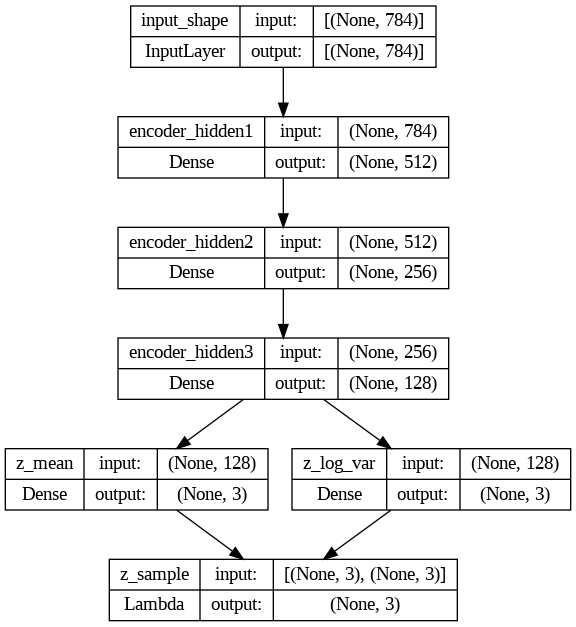

In [ ]:
def encoder():
  # 인코더의 입력층을 생성합니다.
  inputs = Input(shape=(input_shape,), name='input_shape')

  # 인코더의 hidden층을 생성(784 -> 512 -> 256 -> 128)
  encoder_hidden1 = layers.Dense(intermediate_dim, activation='relu', name='encoder_hidden1')(inputs)
  encoder_hidden2 = layers.Dense(intermediate_dim2, activation='relu', name='encoder_hidden2')(encoder_hidden1)
  encoder_hidden3 = layers.Dense(intermediate_dim3, activation='relu', name='encoder_hidden3')(encoder_hidden2)

  # 평균(mean)과 표준편차(sigma)층을 정의합니다. 
  # 이때 sigma 대신 log variance를 사용합니다. 이는 신경망의 출력은 음수를 가질 수 있지만 sigma는 항상 양수여야 하기 때문입니다. 
  # 각각 2개의 유닛을 사용했습니다.
  z_mean = layers.Dense(latent_dim, name='z_mean')(encoder_hidden3)
  z_log_var = layers.Dense(latent_dim, name='z_log_var')(encoder_hidden3)

  # 평균과 표준편차를 래핑하여 Z_sampling층을 만듭니다.

  # Z 샘플링 함수 생성
  def sampling(args):
      z_mean, z_log_var = args
      batch = shape(z_mean)[0]
      dim = shape(z_mean)[1]

      # by default, random_normal has mean = 0 and std = 1.0
      # Reparameterization Trick사용을 위해 Gussian(=normal)분포에서 랜덤변수(sample) ε추출 
      epsilon = tf.compat.v2.random.normal(shape=(batch, dim))
      return z_mean + tf.math.exp(0.5 * z_log_var) * epsilon

  #  layers.Lambda API 래핑에 사용할 함수와, 유닛수(n,)를 지정합니다.
  z_sampling = layers.Lambda(sampling, (latent_dim,), name='z_sample')([z_mean, z_log_var])

  # 하나의 입력과 다중충력을 포함하는 encoder 모델을 만듭니다.   
  return Model(inputs,[z_mean,z_log_var,z_sampling], name='encoder')

encoder = encoder()

# 인코더 네트워크를 확인합니다.
encoder.summary()

from tensorflow.keras.utils import plot_model
plot_model(encoder, to_file='vae_mlp_encoder.png', show_shapes=True)

## Decoder Hidden layer 추가 후

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_z (InputLayer)        [(None, 3)]               0         
                                                                 
 decoder_hidden1 (Dense)     (None, 128)               512       
                                                                 
 decoder_hidden2 (Dense)     (None, 256)               33024     
                                                                 
 decoder_hidden3 (Dense)     (None, 512)               131584    
                                                                 
 output (Dense)              (None, 784)               402192    
                                                                 
Total params: 567,312
Trainable params: 567,312
Non-trainable params: 0
_________________________________________________________________


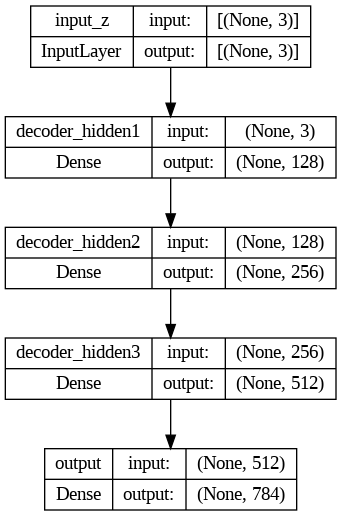

In [ ]:
def decoder():
  
  # 디코더의 입력층 생성. (Decoder의 입력은 latent vector)
  input_z = Input(shape=(latent_dim,), name='input_z')

  # 디코더의 hidden층 생성
  decoder_hidden1 = layers.Dense(intermediate_dim3, activation='relu', name='decoder_hidden1')(input_z)
  decoder_hidden2 = layers.Dense(intermediate_dim2, activation='relu', name='decoder_hidden2')(decoder_hidden1)
  decoder_hidden3 = layers.Dense(intermediate_dim, activation='relu', name='decoder_hidden3')(decoder_hidden2)

  # 디코더의 output으로 dim = 10으로 줄여 classification에 이용
  outputs = layers.Dense(original_dim, activation='sigmoid',name='output')(decoder_hidden3)

  return Model(input_z, outputs, name='decoder')

decoder = decoder()

# 디코더의 네트워크 확인.
decoder.summary()
plot_model(decoder, to_file='vae_mlp_decoder.png', show_shapes=True)

Model: "vae_mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_shape (InputLayer)    [(None, 784)]             0         
                                                                 
 encoder (Functional)        [(None, 3),               566918    
                              (None, 3),                         
                              (None, 3)]                         
                                                                 
 decoder (Functional)        (None, 784)               567312    
                                                                 
Total params: 1,134,230
Trainable params: 1,134,230
Non-trainable params: 0
_________________________________________________________________


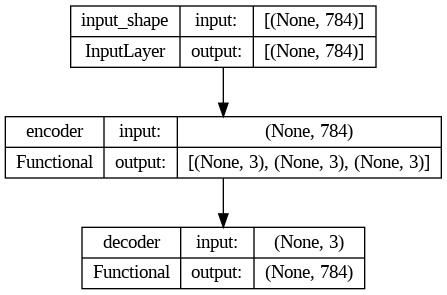

In [ ]:
def vae():
  # vae는 입력으로 이미지로 들어와 encoder를 통해 z_sampling 되어 decoder로 출력됩니다.  
  inputs = Input(shape=(input_shape,), name='input_shape')
  outputs = decoder(encoder(inputs)[2]) #[0]:z_mean, [1]:z_log_var,[2]:z_sampling
  
  return Model(inputs,outputs, name='vae_mlp')

#VAE 모델 정의
model = vae()

#모델 네트워크 확인 
model.summary()
plot_model(model,to_file='vae_mlp.png',show_shapes=True)

In [ ]:
# Hyperparameters
num_epochs = 100
batch_size = 100
learning_rate = 1e-3

In [ ]:
# 모델 학습 loss, optimizer 정의
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
def vae_loss(x,recon_x):
    # (1)Reconstruct loss (Marginal_likelihood) : Cross-entropy 
    z_mean,z_log_var,z_sampling = encoder(x)
    recon_x=decoder(z_sampling)
    reconstruction_loss = binary_crossentropy(x,recon_x)
    #reconstruction_loss = mse(inputs, outputs)
    reconstruction_loss *= original_dim
    # (2) KL divergence(Latent_loss)
    kl_loss = 0.5 * tf.reduce_sum(tf.square(z_mean)+ tf.exp(z_log_var)- z_log_var -1, 1) 
    return tf.reduce_mean(reconstruction_loss + kl_loss) #ELBO(=VAE_loss)

model.compile(optimizer=adam,loss=vae_loss)

In [ ]:
def KLD(x, x_pred):
  z_mean,z_log_var,z_sampling = encoder(x)
  # KL divergence(Latent_loss)
  kl_loss = 0.5 * tf.reduce_sum(tf.square(z_mean)+ tf.exp(z_log_var)- z_log_var -1, 1) 


In [ ]:
# 모델 학습
hist = model.fit(x_train, x_train, epochs=num_epochs, batch_size=batch_size )
#학습된 VAE 모델 저장 
model.save_weights('vae_mnist_0.h5')

Epoch 1/100
60/60 [==============================] - 2s 15ms/step - loss: 245.3298
Epoch 2/100
60/60 [==============================] - 1s 15ms/step - loss: 173.0318
Epoch 3/100
60/60 [==============================] - 1s 15ms/step - loss: 151.0843
Epoch 4/100
60/60 [==============================] - 1s 15ms/step - loss: 146.9380
Epoch 5/100
60/60 [==============================] - 1s 15ms/step - loss: 145.4066
Epoch 6/100
60/60 [==============================] - 1s 15ms/step - loss: 144.1951
Epoch 7/100
60/60 [==============================] - 1s 14ms/step - loss: 143.3773
Epoch 8/100
60/60 [==============================] - 1s 15ms/step - loss: 142.9428
Epoch 9/100
60/60 [==============================] - 1s 14ms/step - loss: 142.1460
Epoch 10/100
60/60 [==============================] - 1s 16ms/step - loss: 140.9271
Epoch 11/100
60/60 [==============================] - 1s 14ms/step - loss: 138.6983
Epoch 12/100
60/60 [==============================] - 1s 15ms/step - loss: 136.8082
E

## 0으로 학습한 후, 0 이미지 test data로 IQR 구하기

In [ ]:
test_score = model.evaluate(x_test, x_test, verbose=0)
prediction = model.predict(x_test)

31/31 [==============================] - 0s 3ms/step


## MSE function 구현

In [ ]:
def MSE(p, q):
  return np.mean((p - q)**2)

## KLD loss function 구현

In [ ]:
def KLD(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

## 0 이미지로만 구성된 test dataset을 활용하여 MSE 값 측정 + IQR

In [ ]:
MSE_loss = []
for i in range(len(x_test)):
  MSE_loss.append(MSE(x_test[i], prediction[i]))


print("MSE mean: ", np.mean(MSE_loss))
print("MSE variance: ", np.var(MSE_loss))
print("MSE standard deviation: ", np.std(MSE_loss))
mean_mse = np.mean(MSE_loss)
mean_lower_mse, mean_upper_mse = mean_mse - np.std(MSE_loss), mean_mse + np.std(MSE_loss)
print("mean_lower: ", mean_lower_mse)
print("mean_upper: ", mean_upper_mse)
print("MSE min: ", np.min(MSE_loss))
print("\n")

# IQR 계산
q25_mse = np.quantile(MSE_loss, 0.25)
q75_mse = np.quantile(MSE_loss, 0.75)
iqr_mse = q75_mse - q25_mse

cut_off_mse = iqr_mse*1.5
lower_mse, upper_mse = q25_mse - cut_off_mse, q75_mse + cut_off_mse
print("IQR: ", iqr_mse)
print("Lower: ", lower_mse)
print("Upper: ", upper_mse)
print("\n")

MSE mean:  0.02738043835854703
MSE variance:  0.00019150535423935155
MSE standard deviation:  0.013838545958277248
mean_lower:  0.01354189240026978
mean_upper:  0.041218984316824275
MSE min:  0.007774628601411091


IQR:  0.01432316737409486
Lower:  -0.003130555205432376
Upper:  0.05416211429094706




## 0 이미지로만 구성된 test dataset을 활용하여 KLD 평균 & 분산 값 측정 + IQR

In [ ]:
KLD_loss = []
for i in range(len(x_test)):
  KLD_loss.append(KLD(x_test[i], prediction[i]))


print("KLD mean: ", np.mean(KLD_loss))
print("KLD variance: ", np.var(KLD_loss))
print("KLD standard deviation: ", np.std(KLD_loss))
mean = np.mean(KLD_loss)
mean_lower, mean_upper = mean - np.std(KLD_loss), mean + np.std(KLD_loss)
print("mean_lower: ", mean_lower)
print("mean_upper: ", mean_upper)
print("\n")

# IQR 계산
q25 = np.quantile(KLD_loss, 0.25)
q75 = np.quantile(KLD_loss, 0.75)
iqr = q75 - q25

cut_off = iqr*1.5
lower, upper = q25 - cut_off, q75 + cut_off
print("IQR: ", iqr)
print("Lower: ", lower)
print("Upper: ", upper)
print("\n")

KLD mean:  39.29456292973868
KLD variance:  657.247436359506
KLD standard deviation:  25.6368374874809
mean_lower:  13.657725442257782
mean_upper:  64.93140041721958


IQR:  25.894782504987994
Lower:  -16.05473175749556
Upper:  87.5243982624564




<ipython-input-39-396c62958cca>:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
<ipython-input-39-396c62958cca>:2: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 0 이미지에 8 이미지를 섞은 후, 8 이미지를 outlier로 잡는지 실험

## Loss function: MSE

In [ ]:
outlier_score = model.evaluate(outlier_images, outlier_images, verbose=0) # loss 값 결과 확인

sample_size = len(outlier_images)                     # 보여줄 sample 갯수 설정
prediction3 = model.predict(outlier_images)      # test 데이터로 이미지 복원(predict 함수 사용)

# Dataframe에 저장할 list생성
File_name = []
Result = []
Loss = []

# mixed dataset내 각각의 data point마다 KLD loss를 구한다
MSE_data = []
for i in range(sample_size):
  MSE_data.append(MSE(outlier_images[i], prediction3[i]))

# 위에서 구한 KLD mean의 lower, upper에 따라 outlier detection 수행
for i in range(sample_size):
  File_name.append(files0_8_test[i])
  Loss.append(MSE_data[i])
  if MSE_data[i] < mean_upper_mse and MSE_data[i] > mean_lower_mse:
    Result.append(1)
  else:
    Result.append(0)

#print("--------------------------------------------------------\n")
data = {'file_name' : File_name, 
        'loss' : Loss, 
        'result' : Result}
data = pd.DataFrame(data)
#print(data)

# Confusion matrix
y_true = outlier_Y
y_pred = Result
confusion_matrix(y_true, y_pred, labels=[1,0])

# 분류 성능 평가
print("Acc: ", accuracy_score(y_true, y_pred))
print("Precision: ", precision_score(y_true, y_pred, pos_label=1))
print("Recall: ", recall_score(y_true, y_pred, pos_label=1))
print("F1 score: ", f1_score(y_true, y_pred, pos_label=1))

# ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)
print("AUROC: ", auc(fpr, tpr))
print("\n")

# csv file로 저장
#data.to_csv("drive/MyDrive/Hail_yeongmin/data/VAE_outlier_MSE.csv", mode='w', index = None)

32/32 [==============================] - 0s 3ms/step
Acc:  0.801
Precision:  1.0
Recall:  0.7969387755102041
F1 score:  0.8869960249858035
AUROC:  0.898469387755102




## Loss function: MSE + IQR

In [ ]:
outlier_score = model.evaluate(outlier_images, outlier_images, verbose=0) # loss 값 결과 확인

sample_size = len(outlier_images)                     # 보여줄 sample 갯수 설정
prediction3 = model.predict(outlier_images)      # test 데이터로 이미지 복원(predict 함수 사용)

# Dataframe에 저장할 list생성
File_name = []
Result = []
True_Result = outlier_Y.tolist()
Loss = []

# mixed dataset내 각각의 data point마다 KLD loss를 구한다
MSE_data = []
for i in range(sample_size):
  MSE_data.append(MSE(outlier_images[i], prediction3[i]))

# 위에서 구한 KLD mean의 lower, upper에 따라 outlier detection 수행
for i in range(sample_size):
  File_name.append(files0_8_test[i])
  Loss.append(MSE_data[i])
  if MSE_data[i] < upper_mse and MSE_data[i] > lower_mse:
    Result.append(1)
  else:
    Result.append(0)

#print("--------------------------------------------------------\n")
data = {'file_name' : File_name, 
        'loss' : Loss,
        'true' : True_Result,
        'pred' : Result}
data = pd.DataFrame(data)
print(data)

# Confusion matrix
y_true = outlier_Y
y_pred = Result
confusion_matrix(y_true, y_pred, labels=[1,0])


# 분류 성능 평가
print("Acc: ", accuracy_score(y_true, y_pred))
print("Precision: ", precision_score(y_true, y_pred, pos_label=1))
print("Recall: ", recall_score(y_true, y_pred, pos_label=1))
print("F1 score: ", f1_score(y_true, y_pred, pos_label=1))

# ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)
print("AUROC: ", auc(fpr, tpr))
print("\n")

# csv file로 저장
#data.to_csv("drive/MyDrive/Hail_yeongmin/data/VAE_outlier_MSE.csv", mode='w', index = None)

32/32 [==============================] - 0s 8ms/step
    file_name      loss  true  pred
0       3.png  0.034244     1     1
1      10.png  0.015533     1     1
2      13.png  0.011247     1     1
3      25.png  0.040630     1     1
4      28.png  0.018602     1     1
..        ...       ...   ...   ...
995  9952.png  0.013539     1     1
996  9962.png  0.031194     1     1
997  9964.png  0.026849     1     1
998  9983.png  0.017999     1     1
999  9993.png  0.044711     1     1

[1000 rows x 4 columns]
Acc:  0.949
Precision:  0.9978563772775991
Recall:  0.95
F1 score:  0.9733403031887088
AUROC:  0.9249999999999999




## Loss function: KLD

In [ ]:
outlier_score = model.evaluate(outlier_images, outlier_images, verbose=0) # loss 값 결과 확인

sample_size = len(outlier_images)                     # 보여줄 sample 갯수 설정
prediction3 = model.predict(outlier_images)      # test 데이터로 이미지 복원(predict 함수 사용)

# Dataframe에 저장할 list생성
File_name = []
Result = []
Loss = []

# mixed dataset내 각각의 data point마다 KLD loss를 구한다
KLD_data = []
for i in range(sample_size):
  KLD_data.append(KLD(outlier_images[i], prediction3[i]))

# KLD loss가 가장 작은 이미지와, 가장 큰 이미지
for i in range(sample_size):
  if KLD_data[i] == np.min(KLD_data):
    print("File name: ", files0_8_test[i])
    min = i

for i in range(sample_size):
  if KLD_data[i] == np.max(KLD_data):
    print("File name: ", files0_8_test[i])
    max = i

# 위에서 구한 KLD mean의 lower, upper에 따라 outlier detection 수행
for i in range(sample_size):
  File_name.append(files0_8_test[i])
  Loss.append(KLD_data[i])
  if KLD_data[i] < mean_upper and KLD_data[i] > mean_lower:
    Result.append(1)
  else:
    Result.append(0)

#print("--------------------------------------------------------\n")
data = {'file_name' : File_name, 
        'loss' : Loss, 
        'result' : Result}
data = pd.DataFrame(data)
#print(data)

# Confusion matrix
y_true = outlier_Y
y_pred = Result
confusion_matrix(y_true, y_pred, labels=[1,0])

# 분류 성능 평가
print("Acc: ", accuracy_score(y_true, y_pred))
print("Precision: ", precision_score(y_true, y_pred, pos_label=1))
print("Recall: ", recall_score(y_true, y_pred, pos_label=1))
print("F1 score: ", f1_score(y_true, y_pred, pos_label=1))

# ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)
print("AUROC: ", auc(fpr, tpr))
print("\n")

32/32 [==============================] - 0s 3ms/step
File name:  704.png
File name:  5270.png
Acc:  0.816
Precision:  0.9962593516209476
Recall:  0.8153061224489796
F1 score:  0.8967452300785634
AUROC:  0.8326530612244897




<ipython-input-39-396c62958cca>:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
<ipython-input-39-396c62958cca>:2: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


## Loss function: KLD + IQR

In [ ]:
outlier_score = model.evaluate(outlier_images, outlier_images, verbose=0) # loss 값 결과 확인

sample_size = len(outlier_images)                     # 보여줄 sample 갯수 설정
prediction3 = model.predict(outlier_images)      # test 데이터로 이미지 복원(predict 함수 사용)

# Dataframe에 저장할 list생성
File_name = []
Result = []
Loss = []

# mixed dataset내 각각의 data point마다 KLD loss를 구한다
KLD_data = []
for i in range(sample_size):
  KLD_data.append(KLD(outlier_images[i], prediction3[i]))

# 위에서 구한 IQR의 lower, upper에 따라 outlier detection 수행
for i in range(sample_size):
  File_name.append(files0_8_test[i])
  Loss.append(KLD_data[i])
  if KLD_data[i] < upper and KLD_data[i] > lower:
    Result.append(1)
  else:
    Result.append(0)

#print("--------------------------------------------------------\n")
data = {'file_name' : File_name, 
        'loss' : Loss, 
        'result' : Result}
data = pd.DataFrame(data)
#print(data)

# Confusion matrix
y_true = outlier_Y
y_pred = Result
confusion_matrix(y_true, y_pred, labels=[1,0])

# 분류 성능 평가
print("Acc: ", accuracy_score(y_true, y_pred))
print("Precision: ", precision_score(y_true, y_pred, pos_label=1))
print("Recall: ", recall_score(y_true, y_pred, pos_label=1))
print("F1 score: ", f1_score(y_true, y_pred, pos_label=1))

# ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)
print("AUROC: ", auc(fpr, tpr))
print("\n")


32/32 [==============================] - 0s 3ms/step
Acc:  0.955
Precision:  0.9915878023133544
Recall:  0.9622448979591837
F1 score:  0.9766960124287934
AUROC:  0.7811224489795917




<ipython-input-39-396c62958cca>:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
<ipython-input-39-396c62958cca>:2: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


## MSE 사용했을 때 결과 요약

216/216 [==============================] - 1s 3ms/step
Normal Metric
        Normal_mse
count  6903.000000
mean      0.023780
std       0.010451
min       0.005357
25%       0.016579
50%       0.021729
75%       0.028403
max       0.142811


31/31 [==============================] - 0s 4ms/step
Anomaly Metric
       Anomaly_mse
count   974.000000
mean      0.093599
std       0.024079
min       0.032211
25%       0.077919
50%       0.091599
75%       0.107918
max       0.186052




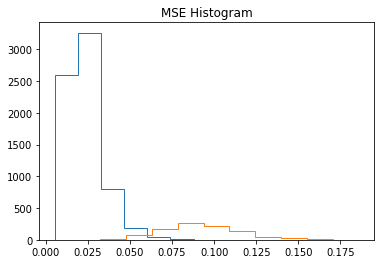

In [ ]:
import pandas as pd # pandas 라이브러리

# Normal data (data_3000)
Nom_data = np.concatenate((x_test, x_train), axis = 0)
Nom_pred = model.predict(Nom_data) # AE 이미지 결과값 
Nom_pred_mse = np.mean(np.power(Nom_data - Nom_pred, 2), axis=1) # input - output 이미지간의 MSE 구하기

# 기초통계학 평균, 분산, 최소값, 최대값, 25%, 50%, 75% 분포 구하는 방법
print('Normal Metric')
Nom_pred_mse_df = pd.DataFrame({'Normal_mse':Nom_pred_mse})
print(Nom_pred_mse_df.describe())

print('\n')

# Abnormal data (data_1000)
ANom_pred = model.predict(ANom_images) # AE 이미지 결과값 
ANom_pred_mse = np.mean(np.power(ANom_images - ANom_pred, 2), axis=1) # input - output 이미지간의 MSE 구하기

# 기초통계학 평균, 분산, 최소값, 최대값, 25%, 50%, 75% 분포 구하는 방법
print('Anomaly Metric')
ANom_pred_mse_df = pd.DataFrame({'Anomaly_mse':ANom_pred_mse})
print(ANom_pred_mse_df.describe())

# 히스토그램 그리기
print('\n')
plt.figure()
plt.title('MSE Histogram') # 그림 이름 설정 
plt.hist(Nom_pred_mse, bins=10, facecolor='blue', histtype='step') #히스토그램 함수, bins:데이터를 범주화 하는 기준
plt.hist(ANom_pred_mse, bins=10, facecolor='red', histtype='step') #히스토그램 함수, bins:데이터를 범주화 하는 기준
plt.show()

In [ ]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import tensorflow as tf
import seaborn as sns
sns.set()

In [ ]:
for i in range(0, 10):
  #if kl_divergence(outlier_images[i], prediction3[i]) > 100:
    #print("Index:", i, " File Name: ", File_name[i], " KLD: ", kl_divergence(outlier_images[i], prediction3[i]))
  print("File Name: ", File_name[i], " KLD: ", KLD(outlier_images[i], prediction3[i]))

File Name:  3.png  KLD:  55.551144977104954
File Name:  10.png  KLD:  29.031707474109925
File Name:  13.png  KLD:  23.900435442365318
File Name:  25.png  KLD:  33.245223444811174
File Name:  28.png  KLD:  30.401437684443685
File Name:  55.png  KLD:  33.934347355780986
File Name:  61-8.png  KLD:  60.1360954667677
File Name:  69.png  KLD:  27.440649612204595
File Name:  71.png  KLD:  39.328127498967284
File Name:  84-8.png  KLD:  211.42537358227946


<ipython-input-39-396c62958cca>:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
<ipython-input-39-396c62958cca>:2: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


<ipython-input-39-396c62958cca>:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
<ipython-input-39-396c62958cca>:2: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


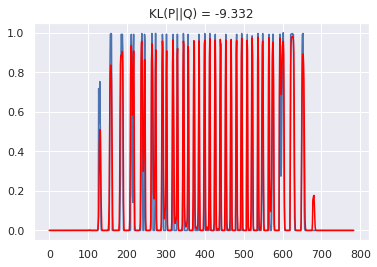

In [ ]:
# KLD loss가 가장 작은 이미지 데이터
x = np.arange(0, 784, 1)
p = outlier_images[min]
q = prediction3[min]
plt.title('KL(P||Q) = %1.3f' % KLD(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')

<ipython-input-39-396c62958cca>:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
<ipython-input-39-396c62958cca>:2: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


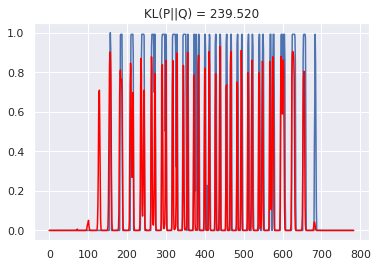

In [ ]:
# KLD loss가 가장 큰 이미지 데이터
x = np.arange(0, 784, 1)
p = outlier_images[max]
q = prediction3[max]
plt.title('KL(P||Q) = %1.3f' % KLD(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')